<a href="https://colab.research.google.com/github/honorine22/Angular-AlbumStoreProductPage/blob/master/Honorine_Charlotte_Plotting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [20]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#YOUR CODE
# import data
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1OMaUzxTjVOVL_Z9F4JcHh0ERZKnrkcdr')

dc = df[['id', 'make', 'feScore', 'cylinders', 'comb', 'co2', 'displ', 'ghgScore']]
dc.head()




,id,make,feScore,cylinders,comb,co2,displ,ghgScore
0,32204,Nissan,4,6,18.7389,471,3.8,4
1,32205,Volkswagen,6,4,25.2227,349,2.0,6
2,32206,Volkswagen,5,6,20.6716,429,3.6,5
3,32207,Volkswagen,5,6,19.8774,446,3.6,5
4,32208,Chevrolet,8,4,28.6813,310,2.4,8


:We'll work with the fuel economy dataset in this workspace.

Load the dataset and print at least 10 rows

1.   Load the dataset
2.   print atleast 10 rows of it



In [21]:
#YOUR CODE
# Link to the file (converted to direct download link)
url = 'https://drive.google.com/uc?export=download&id=1OMaUzxTjVOVL_Z9F4JcHh0ERZKnrkcdr'

# Load the dataset
df = pd.read_csv(url)

# Print at least 10 rows
print(df.head(10))


      id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   
5  32209       Lexus          GS 350  2013     Midsize Cars   
6  32210       Lexus      GS 350 AWD  2013     Midsize Cars   
7  32214     Hyundai   Genesis Coupe  2013  Subcompact Cars   
8  32215     Hyundai   Genesis Coupe  2013  Subcompact Cars   
9  32216     Hyundai   Genesis Coupe  2013  Subcompact Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6 

Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

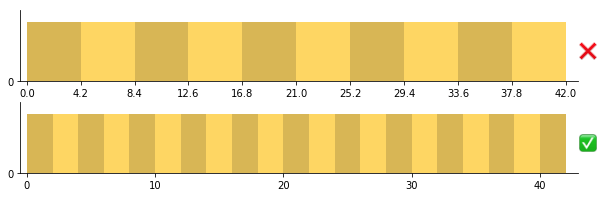

 **Description**
The dataset has a number of different statistics that describe fuel efficiency.


**TO DO**:
1.   create a _histogram_ that depicts the distribution of carbon Dioxide
2.   Play  around with different bin width sizes to see what best depicts the data

Create 2 more histograms based on columns of your choice








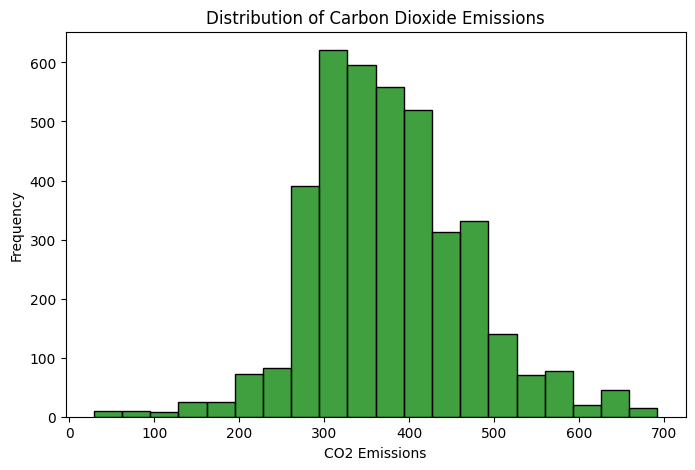

In [22]:
# YOUR CODE HERE
plt.figure(figsize=(8, 5))
sns.histplot(df['co2'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Carbon Dioxide Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

# Try a different bin size
# plt.figure(figsize=(8, 5))
# sns.histplot(df['co2'], bins=40, color='orange', edgecolor='black')
# plt.title('CO2 Emissions with Smaller Bins')
# plt.xlabel('CO2 Emissions')
# plt.ylabel('Frequency')
# plt.show()


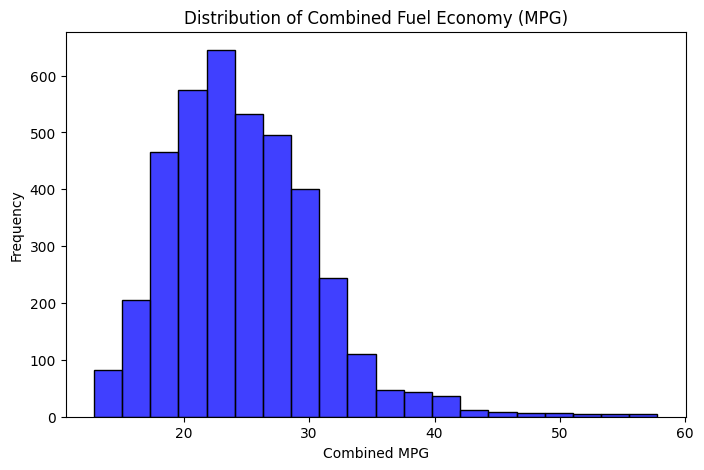

In [23]:
# YOUR CODE HERE
# Histogram of Combined Fuel Economy
plt.figure(figsize=(8, 5))
sns.histplot(df['comb'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Combined Fuel Economy (MPG)')
plt.xlabel('Combined MPG')
plt.ylabel('Frequency')
plt.show()

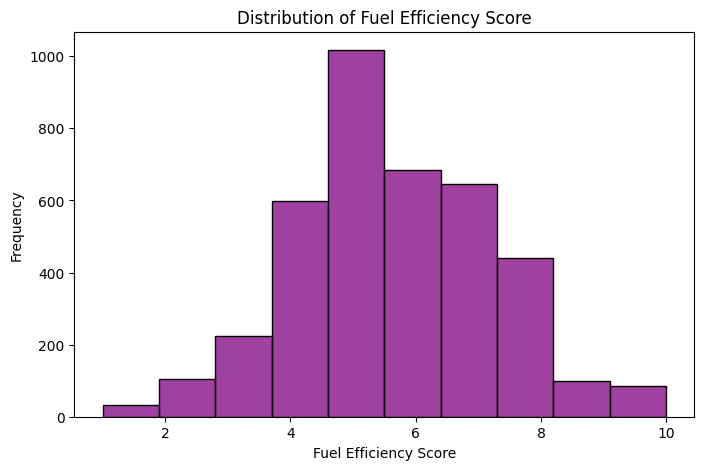

In [24]:
# YOUR CODE HERE
# Histogram of Fuel Efficiency Score
plt.figure(figsize=(8, 5))
sns.histplot(df['feScore'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Fuel Efficiency Score')
plt.xlabel('Fuel Efficiency Score')
plt.ylabel('Frequency')
plt.show()

**TO DO: Write Code that will give you the following plot as below:**

1.   create a heat map of the data
2.Interpret the data - What story does the visualization tell?

>

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer





---

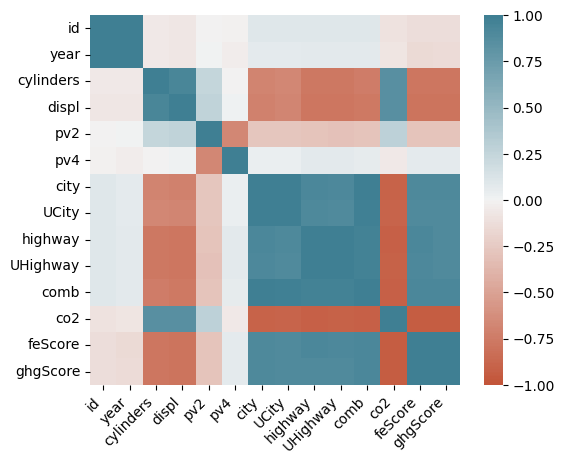

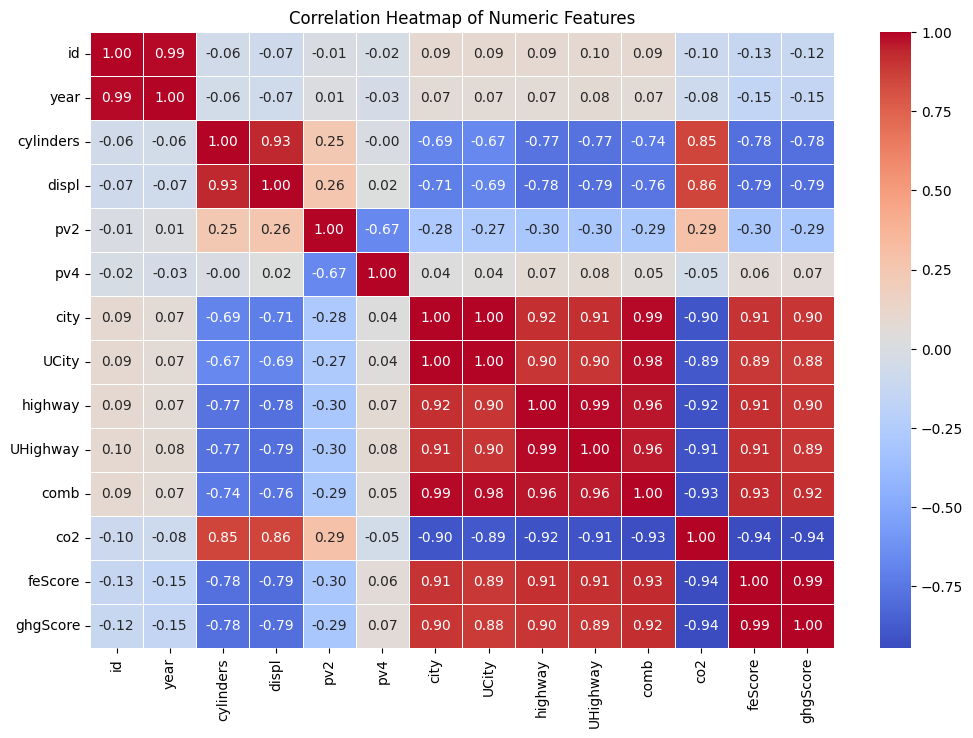

In [25]:
# Select only numerical columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

**Heatmap Interpretation: What Story Does the Visualization Tell?**

The heatmap helps us understand the relationships between different numerical columns in the dataset by showing the strength of their correlations.

*   `ghgScore` exhibits a strong positive correlation with `feScore` and `comb` (combined fuel economy).
*   There is a negative correlation between `ghgScore` and `co2`, `displ` (engine size), and cylinders.
*   Both `feScore` and `comb` are highly correlated with each other, as well as with `ghgScore`.

This indicates that vehicles with better fuel efficiency and lower carbon emissions generally have higher ghgScore values.

**Features to Retain for Predicting ghgScore:**

*   `feScore`: Strong predictor of the ghgScore (positive correlation).
*   `co2`: Emissions data is key in determining the ghgScore.
*   `comb`: Combined fuel economy is directly related to fuel efficiency.
*   `displ`: Engine size tends to affect fuel efficiency and emissions.
*   `cylinders`: Number of cylinders also influences fuel efficiency and emissions.

**Features to Drop:**

*   `id`: This column is just an identifier and does not affect ghgScore.
*   `year`: The vehicle's year might not have a direct impact unless considering time-related changes.
*   `pv2`, `pv4`, `UCity`, `UHighway`: These columns show very weak correlation with other features and can be dropped.
*   `make`, `model`, `fuelType`, `VClass`, `drive`, `trans`: These are categorical variables that require encoding. If not ready to process these, they should be excluded for simplicity.
*   `pcity`, `highway`: These are already captured by the comb column, which provides combined fuel economy.